In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold

In [299]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [300]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [301]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


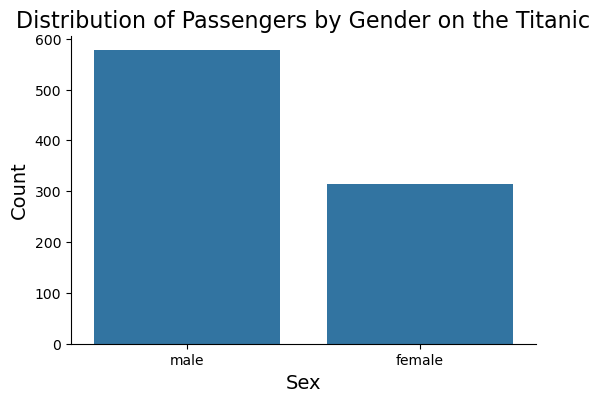

In [302]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=train, x='Sex')

# Add title and labels
ax.set_title('Distribution of Passengers by Gender on the Titanic', fontsize=16)
ax.set_xlabel('Sex', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

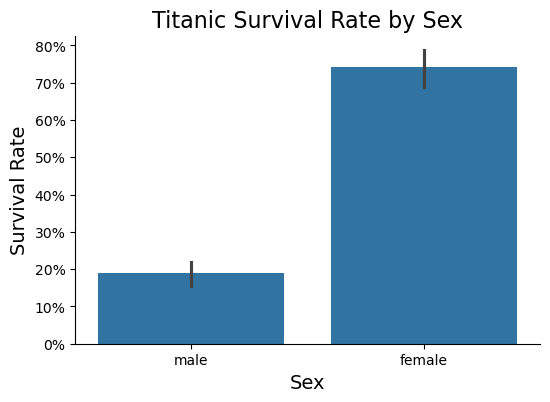

In [303]:
from matplotlib.ticker import PercentFormatter

# Create the bar plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=train, x="Sex", y="Survived")

# Add title and labels
ax.set_title('Titanic Survival Rate by Sex', fontsize=16)
ax.set_xlabel('Sex', fontsize=14)
ax.set_ylabel('Survival Rate', fontsize=14)

ax.yaxis.set_major_formatter(PercentFormatter(1))

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

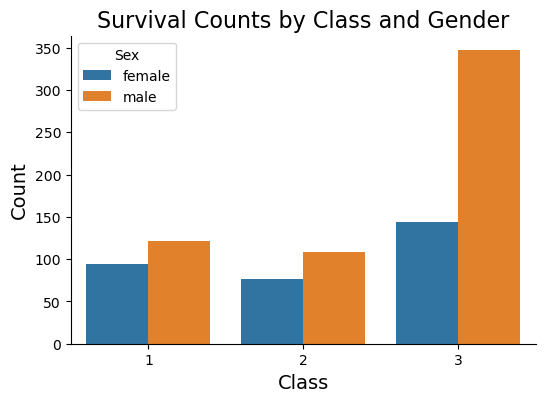

In [304]:
# Create the grouped count plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=train, x='Pclass', hue='Sex')

# Add title and labels
ax.set_title('Survival Counts by Class and Gender', fontsize=16)
ax.set_xlabel('Class', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

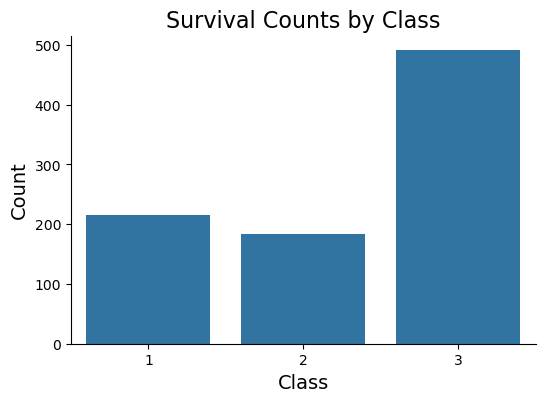

In [305]:
# Create the grouped count plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=train, x='Pclass')

# Add title and labels
ax.set_title('Survival Counts by Class', fontsize=16)
ax.set_xlabel('Class', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

In [306]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [307]:
#removing unnecessary columns
train.drop(['PassengerId','Cabin','Name','Ticket', 'Fare'],axis=1,inplace=True)
test.drop(['PassengerId','Cabin','Name','Ticket', 'Fare'],axis=1,inplace=True)

In [308]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [309]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [310]:
def encoder(str):
    if str=='male':
        return '1'
    if str=='female':
        return '2'
train["Gender"]=train["Sex"].apply(encoder)
train.head()
train.drop(['Sex'],axis=1,inplace=True)

test["Gender"]=test["Sex"].apply(encoder)
test.drop(['Sex'],axis=1,inplace=True)
test.head()

,Pclass,Age,SibSp,Parch,Embarked,Gender
0,3,34.5,0,0,Q,1
1,3,47.0,1,0,S,2
2,2,62.0,0,0,Q,1
3,3,27.0,0,0,S,1
4,3,22.0,1,1,S,2


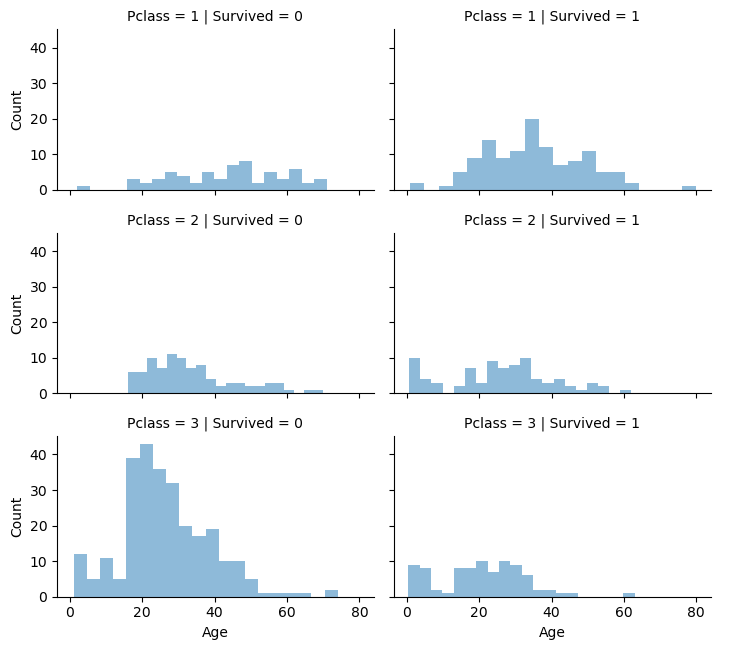

In [311]:
pclass_age_grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
pclass_age_grid.map(plt.hist, 'Age', alpha=.5, bins=20)
pclass_age_grid.add_legend()
pclass_age_grid.set_ylabels('Count')
plt.show()

In [312]:
mean_sur = train[train['Survived']==1]['Age'].mean()
mean_nsur = train[train['Survived']==0]['Age'].mean()
mean_sur, mean_nsur

(np.float64(28.343689655172415), np.float64(30.62617924528302))

In [313]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()

    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)

train["Age"].isnull().sum()

np.int64(0)

In [314]:
train.isnull().sum()
train.dropna(inplace=True)
train.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Embarked    0
Gender      0
dtype: int64

In [315]:
# We can combine SibSp and Parch into a single feature, that of family size.
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
train.drop(['SibSp','Parch'],axis=1,inplace=True)
test.drop(['SibSp','Parch'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,Embarked,Gender,FamilySize
0,0,3,22,S,1,2
1,1,1,38,C,2,2
2,1,3,26,S,2,1
3,1,1,35,S,2,2
4,0,3,35,S,1,1


In [316]:
#Grouping the age into different categories
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 37), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 45), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 45), 'Age'] = 6

train['Age'].value_counts()

Age
1    155
4    154
2    152
3    146
5    118
6    100
0     64
Name: count, dtype: int64

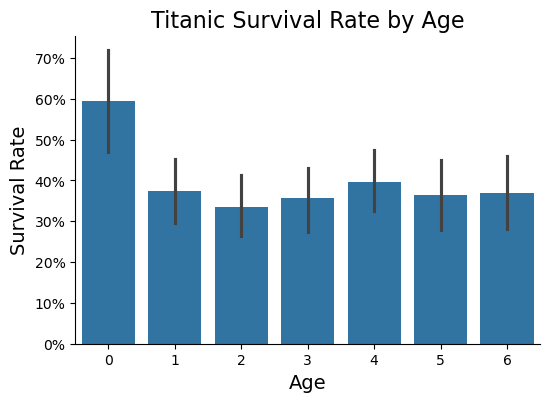

In [317]:
#Getting the survival rates by age groups

plt.figure(figsize=(6,4))
ax = sns.barplot(data=train, x="Age", y="Survived")
ax.set_title('Titanic Survival Rate by Age', fontsize=16)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Survival Rate', fontsize=14)
ax.yaxis.set_major_formatter(PercentFormatter(1))
sns.despine()
plt.show()

In [318]:
data=[train,test]

for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map({'C': 0, 'S': 1, 'Q': 2}).astype(int)
    
train.head()

,Survived,Pclass,Age,Embarked,Gender,FamilySize
0,0,3,2,1,1,2
1,1,1,5,0,2,2
2,1,3,3,1,2,1
3,1,1,4,1,2,2
4,0,3,4,1,1,1


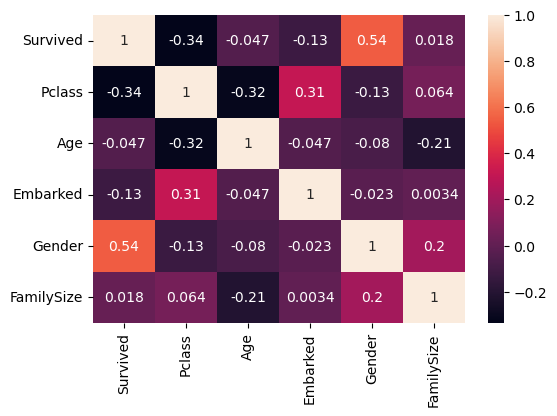

In [319]:
plt.figure(figsize=(6,4))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [320]:
# Getting Data Ready for Modelling and testing
x_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
x_test  = test.copy()
x_train.shape, y_train.shape, x_test.shape
x_test.dropna(inplace=True)
x_test.isnull().sum()

Pclass        0
Age           0
Embarked      0
Gender        0
FamilySize    0
dtype: int64

#### Logistic Regression

In [321]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
print(acc_log, '%')

79.42 %


In [322]:
kf = KFold(n_splits = 10)
scores = cross_val_score(logreg, x_train, y_train, cv=kf, scoring='accuracy')
mean_score_lr = scores.mean()*100
pred = cross_val_predict(logreg, x_train, y_train, cv=kf)

print('Mean Accuracy:', mean_score_lr)
print('Standard Deviation:', scores.std()*100)
print('Scores:', scores*100)
print('Confusion Matrix:\n', confusion_matrix(y_train, pred))
print('Precision:', precision_score(y_train, pred)*100)
print('Recall:', recall_score(y_train, pred)*100)
print('F1 Score:', f1_score(y_train, pred)*100)

Mean Accuracy: 78.74106230847802
Standard Deviation: 2.2066418299529844
Scores: [76.40449438 80.8988764  77.52808989 79.7752809  77.52808989 79.7752809
 77.52808989 75.28089888 83.14606742 79.54545455]
Confusion Matrix:
 [[472  77]
 [112 228]]
Precision: 74.75409836065575
Recall: 67.05882352941175
F1 Score: 70.69767441860465


#### Support Vector Machines

In [323]:
# Support Vector Machines
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
print(acc_svc, '%')

82.9 %


In [324]:
scores = cross_val_score(svc, x_train, y_train, cv=kf, scoring='accuracy')
mean_score_svc = scores.mean()*100
pred = cross_val_predict(svc, x_train, y_train, cv=kf)

print('Mean Accuracy:', mean_score_svc)
print('Standard Deviation:', scores.std()*100)
print('Scores:', scores*100)
print('Confusion Matrix:\n', confusion_matrix(y_train, pred))
print('Precision:', precision_score(y_train, pred)*100)
print('Recall:', recall_score(y_train, pred)*100)
print('F1 Score:', f1_score(y_train, pred)*100)

Mean Accuracy: 82.45658835546476
Standard Deviation: 3.4345085056071665
Scores: [79.7752809  85.39325843 78.65168539 84.26966292 80.8988764  82.02247191
 80.8988764  77.52808989 88.76404494 86.36363636]
Confusion Matrix:
 [[491  58]
 [ 98 242]]
Precision: 80.66666666666666
Recall: 71.17647058823529
F1 Score: 75.625


#### Random Forest Classification

In [325]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(acc_random_forest, '%')

86.84 %


In [326]:
scores = cross_val_score(random_forest, x_train, y_train, cv=kf, scoring='accuracy')
mean_score_rf = scores.mean()*100
pred = cross_val_predict(random_forest, x_train, y_train, cv=kf)

print('Mean Accuracy:', mean_score_rf)
print('Standard Deviation:', scores.std()*100)
print('Scores:', scores*100)
print('Confusion Matrix:\n', confusion_matrix(y_train, pred))
print('Precision:', precision_score(y_train, pred)*100)
print('Recall:', recall_score(y_train, pred)*100)
print('F1 Score:', f1_score(y_train, pred)*100)

Mean Accuracy: 78.96961184882534
Standard Deviation: 4.534439266017559
Scores: [70.78651685 80.8988764  80.8988764  78.65168539 83.14606742 78.65168539
 76.40449438 71.91011236 85.39325843 82.95454545]
Confusion Matrix:
 [[480  69]
 [115 225]]
Precision: 76.53061224489795
Recall: 66.17647058823529
F1 Score: 70.97791798107255


#### K-Nearest Neighbour Classification

In [327]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
print(acc_knn, '%')

85.04 %


In [328]:
scores = cross_val_score(knn, x_train, y_train, cv=kf, scoring='accuracy')
mean_score_knn = scores.mean()*100
pred = cross_val_predict(knn, x_train, y_train, cv=kf)

print('Mean Accuracy:', mean_score_knn)
print('Standard Deviation:', scores.std()*100)
print('Scores:', scores*100)
print('Confusion Matrix:\n', confusion_matrix(y_train, pred))
print('Precision:', precision_score(y_train, pred)*100)
print('Recall:', recall_score(y_train, pred)*100)
print('F1 Score:', f1_score(y_train, pred)*100)

Mean Accuracy: 78.06562819203269
Standard Deviation: 3.223878173465633
Scores: [75.28089888 79.7752809  76.40449438 76.40449438 83.14606742 77.52808989
 74.15730337 75.28089888 84.26966292 78.40909091]
Confusion Matrix:
 [[461  88]
 [107 233]]
Precision: 72.58566978193146
Recall: 68.52941176470588
F1 Score: 70.49924357034796


#### Gaussian Naive Bayes

In [329]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
print(acc_gaussian, '%')

79.98 %


In [330]:
scores = cross_val_score(gaussian, x_train, y_train, cv=kf, scoring='accuracy')
mean_score_gauss = scores.mean()*100
pred = cross_val_predict(gaussian, x_train, y_train, cv=kf)

print('Mean Accuracy:', mean_score_gauss)
print('Standard Deviation:', scores.std()*100)
print('Scores:', scores*100)
print('Confusion Matrix:\n', confusion_matrix(y_train, pred))
print('Precision:', precision_score(y_train, pred)*100)
print('Recall:', recall_score(y_train, pred)*100)
print('F1 Score:', f1_score(y_train, pred)*100)

Mean Accuracy: 79.41777323799795
Standard Deviation: 2.4434879905833897
Scores: [75.28089888 78.65168539 77.52808989 82.02247191 76.40449438 78.65168539
 79.7752809  80.8988764  83.14606742 81.81818182]
Confusion Matrix:
 [[464  85]
 [ 98 242]]
Precision: 74.00611620795107
Recall: 71.17647058823529
F1 Score: 72.56371814092954


#### Decision Tree

In [331]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree, '%')

86.84 %


In [332]:
scores = cross_val_score(decision_tree, x_train, y_train, cv=kf, scoring='accuracy')
mean_score_dec_tree = scores.mean()*100
pred = cross_val_predict(decision_tree, x_train, y_train, cv=kf)

print('Mean Accuracy:', mean_score_dec_tree)
print('Standard Deviation:', scores.std()*100)
print('Scores:', scores*100)
print('Confusion Matrix:\n', confusion_matrix(y_train, pred))
print('Precision:', precision_score(y_train, pred)*100)
print('Recall:', recall_score(y_train, pred)*100)
print('F1 Score:', f1_score(y_train, pred)*100)

Mean Accuracy: 78.40143003064351
Standard Deviation: 4.871925193378932
Scores: [69.66292135 83.14606742 80.8988764  80.8988764  82.02247191 76.40449438
 77.52808989 70.78651685 85.39325843 77.27272727]
Confusion Matrix:
 [[488  61]
 [131 209]]
Precision: 77.4074074074074
Recall: 61.47058823529412
F1 Score: 68.52459016393443


#### Stochastic Gradient Descent

In [333]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
print(acc_sgd, '%')

79.42 %


In [334]:
scores = cross_val_score(sgd, x_train, y_train, cv=kf, scoring='accuracy')
mean_score_sgd = scores.mean()*100
pred = cross_val_predict(sgd, x_train, y_train, cv=kf)

print('Mean Accuracy:', mean_score_sgd)
print('Standard Deviation:', scores.std()*100)
print('Scores:', scores*100)
print('Confusion Matrix:\n', confusion_matrix(y_train, pred))
print('Precision:', precision_score(y_train, pred)*100)
print('Recall:', recall_score(y_train, pred)*100)
print('F1 Score:', f1_score(y_train, pred)*100)

Mean Accuracy: 77.84090909090911
Standard Deviation: 4.048682453493973
Scores: [77.52808989 80.8988764  74.15730337 74.15730337 82.02247191 74.15730337
 79.7752809  71.91011236 85.39325843 78.40909091]
Confusion Matrix:
 [[464  85]
 [127 213]]
Precision: 71.47651006711409
Recall: 62.64705882352941
F1 Score: 66.77115987460816


#### Finding Best Model

In [335]:
res = pd.DataFrame({
    "Model": ["Logistic Regression", "Support Vector Machines", "Random Forest", "KNN", "Naive Bayes", "Decision Tree", "Stochastic Gradient Descent"],
    "Score": [acc_log, acc_svc, acc_random_forest, acc_knn, acc_gaussian, acc_decision_tree, acc_sgd],
    "Mean Score": [mean_score_lr, mean_score_svc, mean_score_rf, mean_score_knn, mean_score_gauss, mean_score_dec_tree, mean_score_sgd]
})

df_res = res.sort_values(by="Mean Score", ascending=False)
df_res = df_res.set_index("Model")
df_res

,Score,Mean Score
Model,,
Support Vector Machines,82.90,82.456588
Naive Bayes,79.98,79.417773
Random Forest,86.84,78.969612
Logistic Regression,79.42,78.741062
Decision Tree,86.84,78.401430
KNN,85.04,78.065628
Stochastic Gradient Descent,79.42,77.840909


            importance
feature               
Gender           0.405
Age              0.199
Pclass           0.169
FamilySize       0.165
Embarked         0.061


<Figure size 600x400 with 0 Axes>

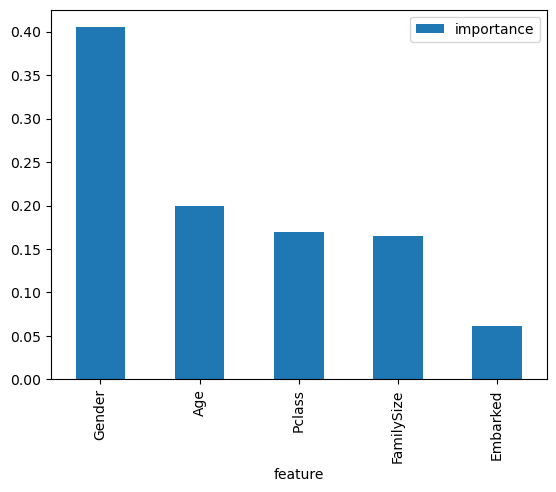

In [336]:
importance = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importance = importance.sort_values('importance',ascending=False).set_index('feature')
print(importance)
plt.figure(figsize=(6,4))
importance.plot.bar()
plt.show()

In [338]:
test_sub = pd.read_csv('test.csv')
y_pred = svc.predict(x_test)
submission = pd.DataFrame({
        "PassengerId": test_sub["PassengerId"],
        "Survived": y_pred
    })
submission.sort_values(by='PassengerId', inplace=True)
submission.to_csv('submission.csv', index=False)